In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import cluster
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score, mean_absolute_percentage_error
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
import math

In [ ]:
dataset_path = '/content/drive/MyDrive/OLAP/Data/Levels_Fyi_Salary_Data.csv'

In [ ]:
df_salary = pd.read_csv(dataset_path)

<ipython-input-84-6aa32920bc8a>:1: DtypeWarning: Columns (0,1,2,3,5,6,9,13,14,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_salary = pd.read_csv(dataset_path)


In [ ]:
df_salary.head()

,timestamp,company,level,title,totalyearlycompensation,location,citiname,yearsatcompany,yearsofexperience,tag,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,1/27/2020,Google,L6,Software Engineer,400000.0,Sunnyvale,CA,1.5,1.5,Distributed Systems (Back-End),...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Asian,PhD
1,7/3/2020,Microsoft,61,Software Engineer,136000.0,Redmond,WA,3.0,5.0,DevOps,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Two Or More,Bachelor's Degree
2,7/3/2020,Google,L5,Software Engineer,337000.0,San Bruno,CA,0.0,8.0,Full Stack,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Asian,Bachelor's Degree
3,7/3/2020,Microsoft,62,Software Engineer,222000.0,Seattle,WA,5.0,7.0,API Development (Back-End),...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Asian,Master's Degree
4,7/3/2020,Blend,IC3,Software Engineer,187000.0,San Francisco,CA,3.0,5.0,Full Stack,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,White,Bachelor's Degree


# Preprocessing Data

In [ ]:
df_salary.head()

,timestamp,company,level,title,totalyearlycompensation,location,citiname,yearsatcompany,yearsofexperience,tag,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,1/27/2020,Google,L6,Software Engineer,400000.0,Sunnyvale,CA,1.5,1.5,Distributed Systems (Back-End),...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Asian,PhD
1,7/3/2020,Microsoft,61,Software Engineer,136000.0,Redmond,WA,3.0,5.0,DevOps,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Two Or More,Bachelor's Degree
2,7/3/2020,Google,L5,Software Engineer,337000.0,San Bruno,CA,0.0,8.0,Full Stack,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Asian,Bachelor's Degree
3,7/3/2020,Microsoft,62,Software Engineer,222000.0,Seattle,WA,5.0,7.0,API Development (Back-End),...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Asian,Master's Degree
4,7/3/2020,Blend,IC3,Software Engineer,187000.0,San Francisco,CA,3.0,5.0,Full Stack,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,White,Bachelor's Degree


In [ ]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                21553 non-null  object 
 1   company                  21551 non-null  object 
 2   level                    21503 non-null  object 
 3   title                    21553 non-null  object 
 4   totalyearlycompensation  21553 non-null  float64
 5   location                 21553 non-null  object 
 6   citiname                 21553 non-null  object 
 7   yearsatcompany           62642 non-null  float64
 8   yearsofexperience        62642 non-null  float64
 9   tag                      21553 non-null  object 
 10  basesalary               21553 non-null  float64
 11  stockgrantvalue          21553 non-null  float64
 12  bonus                    21553 non-null  float64
 13  gender                   21553 non-null  object 
 14  otherdetails          

In [ ]:
# Choose property in need to cluster
# + timestamp
# + company
# + level
# + title
# + location
# + yearofexperience
# + tag
# + basesalary
# + bonus
# + gender
# + Master_Degree
# + Education


In [ ]:
un_need = ["timestamp","citiname","yearsatcompany","stockgrantvalue","bonus","otherdetails","cityid","dmaid","rowNumber","level","tag","Race_Asian","Race_White",
           "Race_Two_Or_More","Race_Black","Race_Hispanic","Masters_Degree","Bachelors_Degree","Doctorate_Degree","Highschool","Some_College","totalyearlycompensation",
           "location","gender","Race","company","title"]
df_salary_processed = df_salary
# df_salary_processed.head()
for item in un_need:
    print(item)
    df_salary_processed = df_salary_processed.drop(item,axis=1)
df_salary_processed.head()
    

timestamp
citiname
yearsatcompany
stockgrantvalue
bonus
otherdetails
cityid
dmaid
rowNumber
level
tag
Race_Asian
Race_White
Race_Two_Or_More
Race_Black
Race_Hispanic
Masters_Degree
Bachelors_Degree
Doctorate_Degree
Highschool
Some_College
totalyearlycompensation
location
gender
Race
company
title


,yearsofexperience,basesalary,Education
0,1.5,210000.0,PhD
1,5.0,124000.0,Bachelor's Degree
2,8.0,177000.0,Bachelor's Degree
3,7.0,164000.0,Master's Degree
4,5.0,165000.0,Bachelor's Degree


In [ ]:
tag = False
if tag == False:
    df_salary_processed['basesalary'] = df_salary_processed['basesalary']/10000   
    tag = True
df_salary_processed.head()


,yearsofexperience,basesalary,Education
0,1.5,21.0,PhD
1,5.0,12.4,Bachelor's Degree
2,8.0,17.7,Bachelor's Degree
3,7.0,16.4,Master's Degree
4,5.0,16.5,Bachelor's Degree


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
temp = ['Education']
clustered_df = df_salary_processed
for item in temp:
    clustered_df[item] = label_encoder.fit_transform(clustered_df[item])
clustered_df.head()

,yearsofexperience,basesalary,Education
0,1.5,21.0,3
1,5.0,12.4,0
2,8.0,17.7,0
3,7.0,16.4,2
4,5.0,16.5,0


In [ ]:
df_salary_processed = df_salary_processed.dropna()
clustered_df = clustered_df.dropna()


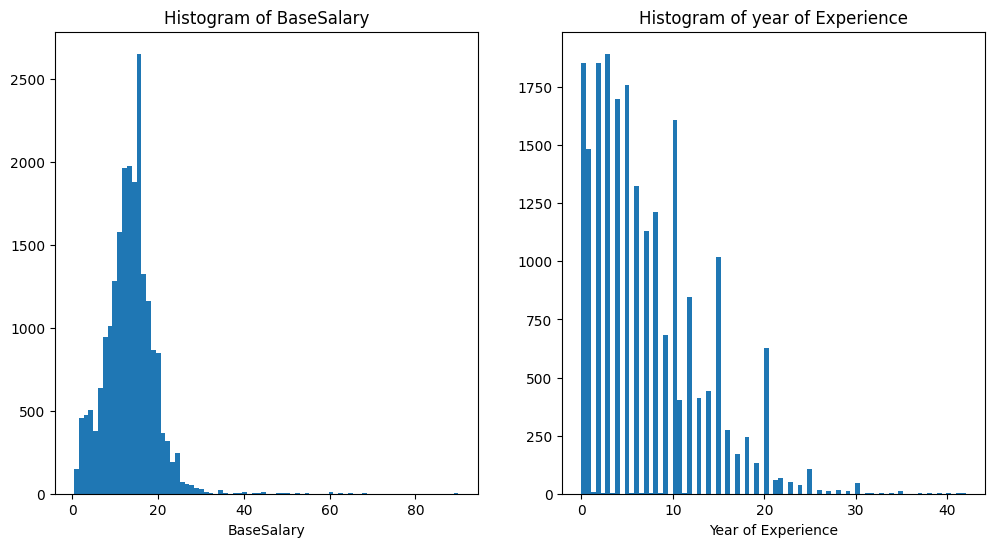

In [ ]:
fig = plt.figure(figsize=(12, 6))
sqft = fig.add_subplot(121)
cost = fig.add_subplot(122)

sqft.hist(df_salary_processed.basesalary, bins=80)
sqft.set_xlabel('BaseSalary')
sqft.set_title("Histogram of BaseSalary")

cost.hist(df_salary_processed.yearsofexperience, bins=80)
cost.set_xlabel('Year of Experience')
cost.set_title("Histogram of year of Experience")

plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
m = ols('basesalary~yearsofexperience',df_salary_processed).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:             basesalary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6797
Date:                Sun, 28 May 2023   Prob (F-statistic):              0.410
Time:                        10:52:41   Log-Likelihood:                -68175.
No. Observations:               21553   AIC:                         1.364e+05
Df Residuals:                   21551   BIC:                         1.364e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.3500      0.06

In [ ]:
n = ols('basesalary~Education',df_salary_processed).fit()
print (n.summary())

                            OLS Regression Results                            
Dep. Variable:             basesalary   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     810.1
Date:                Sun, 28 May 2023   Prob (F-statistic):          5.98e-175
Time:                        10:52:41   Log-Likelihood:                -67777.
No. Observations:               21553   AIC:                         1.356e+05
Df Residuals:                   21551   BIC:                         1.356e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3635      0.053    235.253      0.0

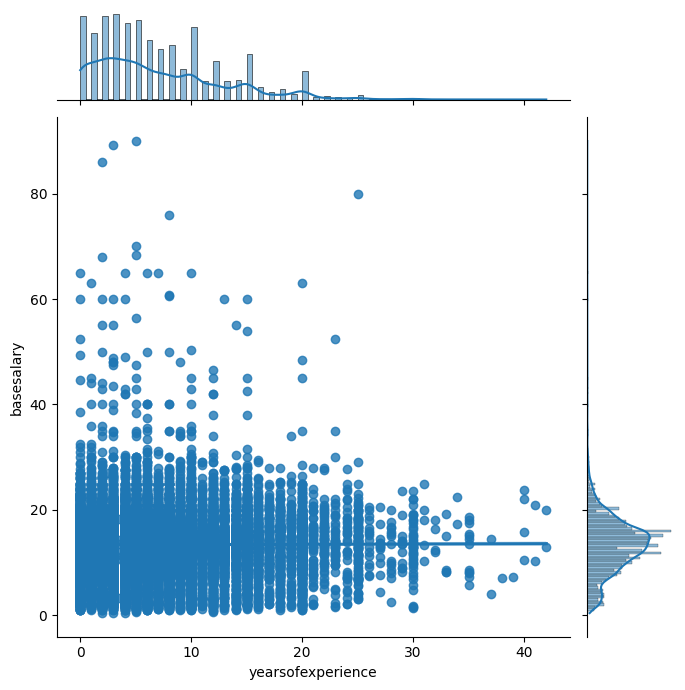

In [ ]:
# Visualizing the regression results
sns.jointplot(x="yearsofexperience", y="basesalary", data=df_salary_processed, kind = 'reg',fit_reg= True, height = 7)
plt.show()

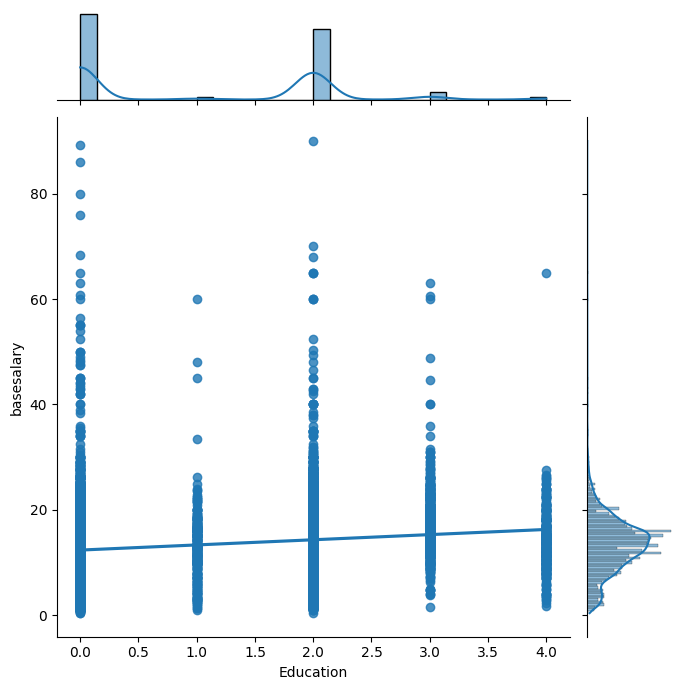

In [ ]:
# Visualizing the regression results
sns.jointplot(x="Education", y="basesalary", data=df_salary_processed, kind = 'reg',fit_reg= True, height = 7)
plt.show()

# Kmean

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df_salary_processed.columns = ['yearsofexperience', 'basesalary','Education']

Text(0, 0.5, 'Base Salary')

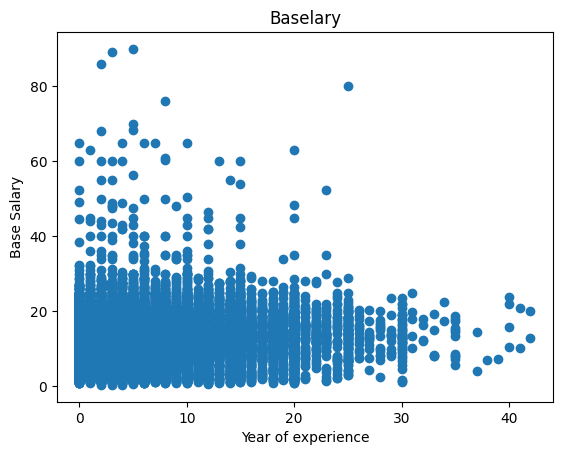

In [ ]:

plt.scatter(df_salary_processed.yearsofexperience, df_salary_processed.basesalary)
plt.title('Baselary')
plt.xlabel('Year of experience')
plt.ylabel('Base Salary')

Text(0, 0.5, 'Base Salary')

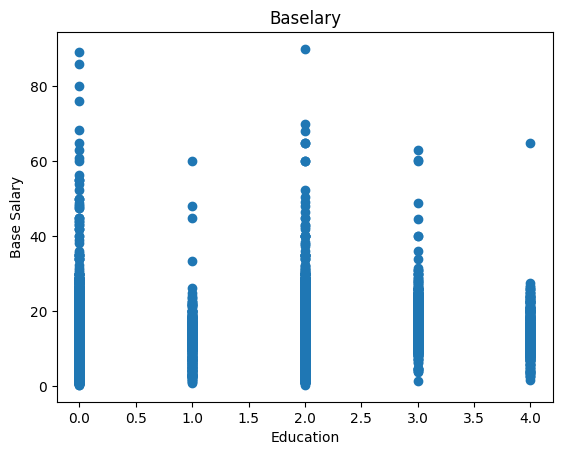

In [ ]:

plt.scatter(df_salary_processed.Education, df_salary_processed.basesalary)
plt.title('Baselary')
plt.xlabel('Education')
plt.ylabel('Base Salary')

In [ ]:
salary = np.array(df_salary_processed)

In [ ]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(salary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
print(centroids)

[[ 4.45075155  8.87482632  0.81520778]
 [15.4390175  13.3595144   1.0577828 ]
 [ 4.43368136 17.70173015  1.26240538]]


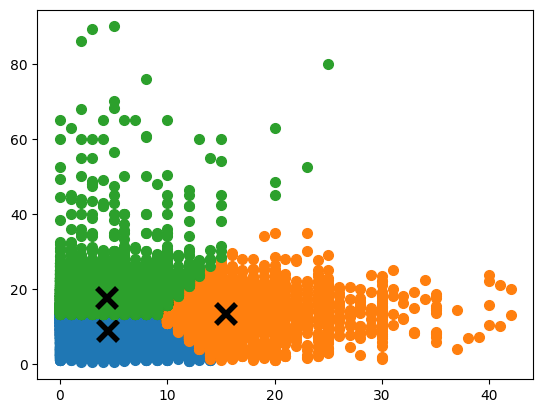

In [ ]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = salary[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)
plt.show()

In [ ]:
clustered_df['Cluster'] = kmeans.labels_
clustered_df.head(20)

,yearsofexperience,basesalary,Education,Cluster
0,1.5,21.0,3,2
1,5.0,12.4,0,0
2,8.0,17.7,0,2
3,7.0,16.4,2,2
4,5.0,16.5,0,2
5,8.5,16.0,0,2
6,15.0,10.3,0,1
7,4.0,16.0,0,2
8,3.0,7.8,0,0
9,12.0,13.0,0,1


In [ ]:
Cluster_mean_average = clustered_df.groupby('Cluster').agg(
    {
        'yearsofexperience':'mean',
        'basesalary':'mean',
        'Education':'mean'
        # 'Education': lambda x: round(x.mean(),0)
    }
).round(2)

In [ ]:
print(Cluster_mean_average)

         yearsofexperience  basesalary  Education
Cluster                                          
0                     4.45        8.87       0.82
1                    15.44       13.37       1.06
2                     4.43       17.70       1.26


# KNN

## Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df_salary_processed.head()

,yearsofexperience,basesalary,Education
0,1.5,21.0,3
1,5.0,12.4,0
2,8.0,17.7,0
3,7.0,16.4,2
4,5.0,16.5,0


In [ ]:
X = df_salary_processed[['yearsofexperience','Education']]
y = df_salary_processed['basesalary']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Model training
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
def evaluation(y_test, y_pred):
  print(f'MSE = {mean_squared_error(y_test, y_pred)}')
  print(f'RMSE = {math.sqrt(mean_squared_error(y_test, y_pred))}')
  print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
  print(f'MAPE = {mean_absolute_percentage_error(y_test, y_pred)}')

In [ ]:
evaluation(y_test, y_pred)

MSE = 50.615649887883706
RMSE = 7.114467646133736
MAE = 5.267888347637825
MAPE = 0.6548540871317503
